In [9]:
import pandas as pd  #数据框操作
import numpy as np 
import matplotlib.pyplot as plt #绘图
import matplotlib as mpl #配置字体
from pyecharts import Geo  #地理图

In [10]:
#这个是绘图格式，不写这个的话横坐标无法变成我们要的内容
mpl.rcParams['font.sans-serif'] = ['SimHei']
#配置绘图风格
plt.rcParams['axes.labelsize'] = 8.
plt.rcParams['xtick.labelsize'] = 12. 
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['legend.fontsize'] =10.
plt.rcParams['figure.figsize'] = [8.,8.]

In [11]:
import pymongo

client= pymongo.MongoClient("mongodb://localhost:27017/")
db=client.python
items = list(db.anjuke_house.find())
data = pd.DataFrame(items)
del data['_id']
del data['house_id']
print(data)

     agelimit     area              budget  built decorate  \
0         满二年     40平米      首付44 万，月供6780元  1999年     简单装修   
1        不满二年  129.4平米    首付114 万，月供17408元  2018年      精装修   
2         满二年   88.7平米     首付90 万，月供13743元  2011年      精装修   
3         满二年  105.1平米     首付67 万，月供10353元  2005年       毛坯   
4        不满二年    113平米    首付198 万，月供30235元  2018年      精装修   
5         满五年     76平米    首付108 万，月供16491元  2002年      精装修   
6         满五年     68平米      首付43 万，月供6642元  1997年     简单装修   
7         满二年    333平米   首付750 万，月供114527元  2013年     豪华装修   
8         满二年   91.3平米     首付72 万，月供10994元  2010年      精装修   
9         满二年  153.9平米    首付144 万，月供21989元  2013年      精装修   
10        满五年   97.2平米     首付90 万，月供13743元  2018年      精装修   
11        满五年     72平米    首付107 万，月供16400元  2000年     豪华装修   
12        满二年   74.2平米     首付91 万，月供13972元  2008年     简单装修   
13        满二年     84平米    首付112 万，月供17179元  2016年      精装修   
14        满二年  304.6平米    首付180 万，月供27486元  2016年       毛坯   
15      

<function matplotlib.pyplot.show(*args, **kw)>

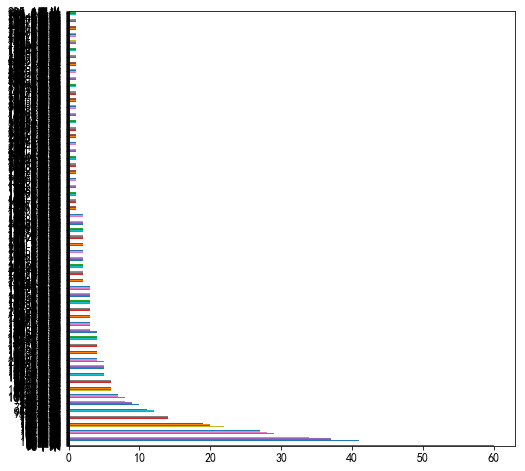

In [12]:
data['area'].value_counts().plot(kind='barh')  #绘制条形图
plt.show   #显示图片

<function matplotlib.pyplot.show(*args, **kw)>

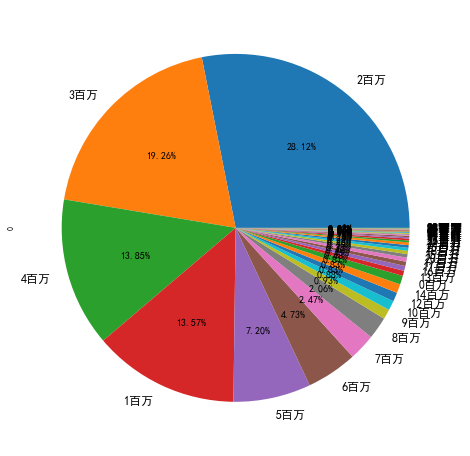

In [46]:
data2 = list(map(lambda x:(str(round(eval(re.split('万',data['tolprice'][x])[0])/100))+'百万'), range(len(data))))
data2 = pd.DataFrame(data2)
data2[0].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show   #显示图片


<function matplotlib.pyplot.show(*args, **kw)>

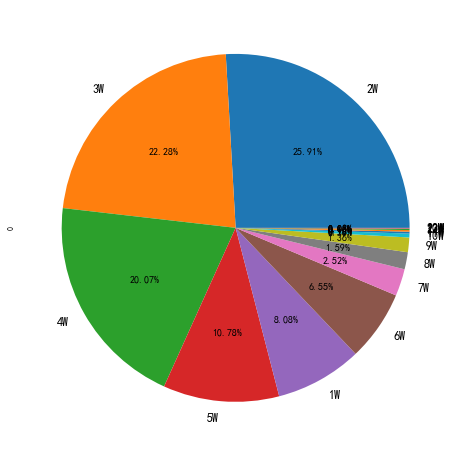

In [44]:
data3 = list(map(lambda x:(str(round(eval(re.split('元/平米',data['price'][x])[0])/10000))+'W'), range(len(data))))
data3 = pd.DataFrame(data3)
data3[0].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show   #显示图片


In [26]:
import re
#从lambda一直到*1000，是一个匿名函数，*1000的原因是这里显示的是几K几K的，我们把K切割掉，只要数字，就*1000了
data2 = list(map(lambda x:(data['area'][x],eval(re.split('万',data['tolprice'][x])[0])),range(len(data))))

#再把data2框架起来
data3 = pd.DataFrame(data2)
#转化成geo所需要的故事，也是用匿名函数，在data3中，按照地区分组，然后根据地区来计算工资的平均值，将其变成序列后再分组
data4 = list(map(lambda x:(data3.groupby(0).mean()[1].index[x],data3.groupby(0).mean()[1].values[x]),range(len(data3.groupby(0)))))

In [14]:
#geo = Geo('主标题','副标题',字体颜色='白色',字体位置='中间'，宽度=1200,高度=600,背景颜色=‘#404a59')
geo = Geo("全国web前端工资分布", "制作:Hsuna", title_color="#fff", title_pos="center",width=1200, height=600, background_color='#404a59')

#属性、数值对应的映射关系,attr是属性,value是该属性对应的数值，比如说北京对应15000，杭州对应10000
attr, value =geo.cast(data4)

#这个是对地图进行设置，第一个参数设置为空值，我看别人这么设置我也这么设置了，下次查查为什么，第二个参数是属性，第三个为对应数值，
#第四个参数是可视范围,把工资区间换算成了0到300. 第五个很容易出错，我之前安装完地图还是出错的原因就是没加上maptype=''china',一定要加上，第六个图例类型写上热力图，
#第七个参数是地图文本字体颜色为白色，第八个是标识大小，第九个是否进行可视化=True.
geo.add("", attr, value, visual_range=[0, 300],maptype='china',type='heatmap' ,visual_text_color="#fff", symbol_size=15, is_visualmap=True)

geo.render()

geo